# **Tutorial:** Custom YOLO Object Detection with RoboFlow

In this tutorial, you'll learn how to create a custom YOLO object detection model using your own classes and annotations with RoboFlow.

### **Step 1: Install Required Dependencies**

In [1]:
%pip install --upgrade ultralytics
%pip install opencv-python
%pip install roboflow
%pip install matplotlib
%pip install numpy==1.26.4 --force-reinstall

  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------- -------------------------------- 0.2/1.1 MB 6.3 MB/s eta 0:00:01
   ------------------------ --------------- 0.7/1.1 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 6.2 MB/s eta 0:00:00
Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: ultralytics-thop
    Found existing installation: ultralytics-thop 2.0.17
    Uninstalling ultralytics-thop-2.0.17:
      Successfully uninstalled ultralytics-thop-2.0.17
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.222
    Uninstalling ultralytics-8.3.222:
      Successfully unin


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/89.9 kB ? eta -:--:--
   ---------------------------------------- 89.9/89.9 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/66.8 kB ? eta -:--:--
   ---------------------------------------- 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 5.9 MB/s eta 0:00:07
   ---------------------------------------- 0.5/38.8 MB 5.6 MB/s eta 0:00:07
    --------------------------------------- 0.8/38.8 MB 6.4 MB/s eta 0:00:06
   - -------------------------------------- 1.2/38.8 MB 7.0 MB/s eta 0:00:06
   - -------------------------------------- 1.5/38.8 MB 7.5 MB/s eta 0:00:05
   - -------------------------------------- 1.9/38.8 MB 7.1 MB/s eta 0:00:06
   -- ------------------------------------- 2.3/38.8 MB 7.6 MB/s eta 0:00:05
   -- ----------------------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Step 2: Import Required Libraries**

In [2]:
import cv2
from roboflow import Roboflow
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import Image, display

### **Step 3: Set Up RoboFlow Account**

1. Go to RoboFlow and create a free account
2. Create a new project and select "Object Detection" as project type
3. Choose "YOLOv8" as the model format

### **Step 4: Upload and Annotate Your Images**

#### Using RoboFlow Web Interface:

1. Click "Upload" to add your images
2. Use the annotation tool to draw bounding boxes around objects
3. Assign the correct class labels to each bounding box
4. Apply preprocessing and augmentation as needed

### **Step 5. Download your Custom your Dataset**

1. In RoboFlow, go to your project dashboard
2. Click "Generate" to create a dataset version
3. Apply any desired augmentations
4. Click "Export" and select "YOLOv**x**" format (**x** the version you are using)
5. Copy the download code

In [37]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ml1CDHxq43Ba5GadQhes")
project = rf.workspace("efraspace").project("detection-pin-ppaag")
version = project.version(3)
dataset = version.download("yolov11")
                
                


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to detection-pin-3 in yolov11:: 100%|██████████| 84/84 [00:00<00:00, 259.72it/s]


### **Step 6: Train Your Custom YOLO Model**

In [38]:
# Load the YOLO model with custom configuration
model = YOLO('yolo11n.pt')  # Using nano version as base

# Train the model on your custom dataset
results = model.train(
    data=f'{dataset.location}/data.yaml',  # Path to dataset config
    epochs=20,  # Number of training epochs
    imgsz=640,  # Image size
    batch=16,   # Batch size
    name='custom_yolo_model'  # Name for the training run
)

Ultralytics 8.3.225  Python-3.11.9 torch-2.9.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=c:\Users\Usuario\OneDrive - yachaytech.edu.ec\Carrera\2025SEM02\IA\lab07\detection-pin-3/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=custom_yolo_model2, nbs=64, nms=False, opset=None, optim

### **Step 7: Evaluate Your Model**

In [40]:
# Evaluate model performance
metrics = model.val()  # Validate the model
print(f"mAP50-95: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")

# Show some validation results
!yolo task=detect mode=val model=runs/detect/custom_yolo_model/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.225  Python-3.11.9 torch-2.9.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
val: Fast image access  (ping: 0.30.1 ms, read: 1483.2141.7 MB/s, size: 2071.3 KB)
val: Scanning C:\Users\Usuario\OneDrive - yachaytech.edu.ec\Carrera\2025SEM02\IA\lab07\detection-pin-3\valid\labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 7/7 5.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 0.5it/s 1.8s
                   all          7          7    0.00333          1      0.995      0.803
Speed: 1.7ms preprocess, 128.9ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to C:\Users\Usuario\OneDrive - yachaytech.edu.ec\Carrera\2025SEM02\IA\lab07\runs\detect\val3
mAP50-95: 0.8031418912698414
mAP50: 0.995


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\ultralytics\cfg\__init__.py", line 913, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\ultralytics\cfg\__init__.py", line 504, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: '-' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'task=detect', 'mode=val', 'model=runs/detect/custom_yolo_model/weights/best.pt', 'data=c:\\Users\\Usuario\\OneDrive', '-', 'yachaytech.edu.ec\\Carrera\\2025SEM02\\IA\\lab07\\detection-pin-3/data.yaml']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK

### **Step 8: Test Your Custom Model on an Image**


image 1/1 C:\Users\Usuario\OneDrive - yachaytech.edu.ec\Carrera\2025SEM02\IA\lab07\test.jpg: 640x640 1 pin, 92.0ms
Speed: 4.8ms preprocess, 92.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


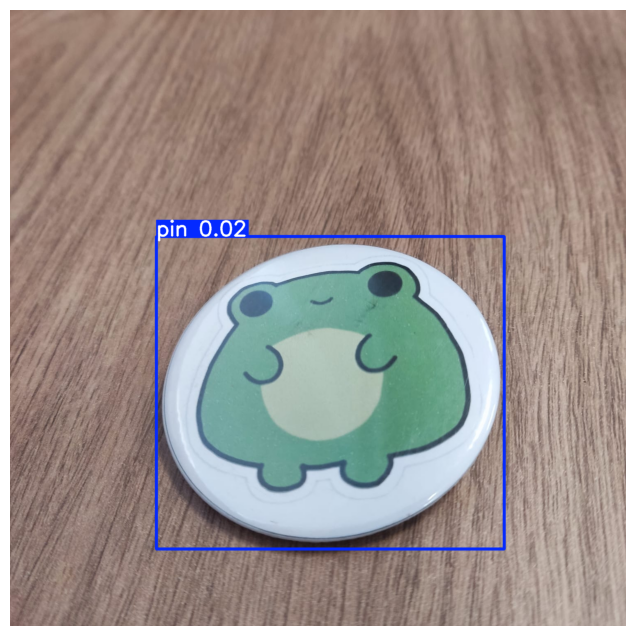

In [46]:
# Load your custom trained model
custom_model = YOLO(r'C:\Users\Usuario\OneDrive - yachaytech.edu.ec\Carrera\2025SEM02\IA\lab07\runs\detect\custom_yolo_model2\weights\best.pt')

# Test on a sample image
results = custom_model(r'C:\Users\Usuario\OneDrive - yachaytech.edu.ec\Carrera\2025SEM02\IA\lab07\test.jpg',conf=0.015)


# Display results
%matplotlib inline
for result in results:
    img = result.plot()  # Plot detections
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

### **Step 9: Test Your Custom Model on Video**

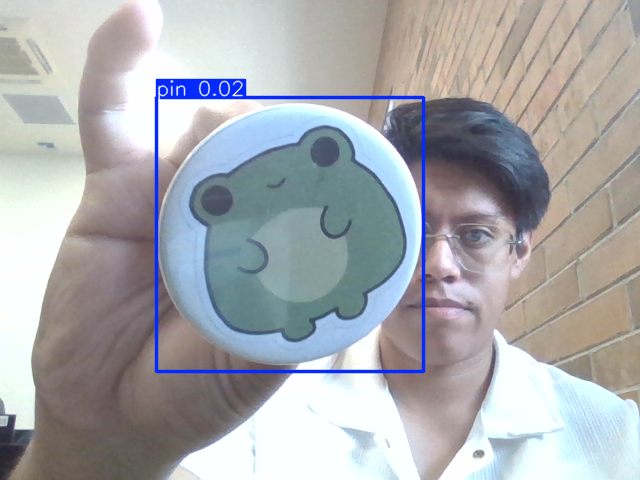


Detención por usuario (KeyboardInterrupt).


In [ ]:
# ...existing code...
import time
import cv2
import numpy as np
from PIL import Image as PILImage
from IPython.display import display, clear_output

# Asegúrate de tener custom_model cargado; si no, carga aquí tu .pt
try:
    custom_model
except NameError:
    custom_model = YOLO(r'C:\Users\Usuario\OneDrive - yachaytech.edu.ec\Carrera\2025SEM02\IA\lab07\runs\detect\custom_yolo_model2\weights\best.pt')

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

prev_time = time.time()
fps = 0.0
conf_thres = 0.015  # ajustar según necesidad

# Intento rápido para detectar si cv2.imshow está disponible
_can_show = True
try:
    cv2.imshow  # sólo referencia, la excepción vendrá al llamar si no hay soporte
except Exception:
    _can_show = False

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        try:
            results = custom_model(frame, stream=True, conf=conf_thres)
        except Exception as e:
            print("Error de inferencia:", e)
            break

        annotated = frame.copy()
        for result in results:
            # Preferir result.plot() si está disponible
            try:
                annotated = result.plot()  # normalmente devuelve BGR
            except Exception:
                # Dibujado manual si plot falla
                for box in result.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
                    conf = float(box.conf[0])
                    cls = int(box.cls[0])
                    # obtener nombre de clase de manera segura
                    names = getattr(result, "names", None) or getattr(custom_model, "names", {})
                    cname = names.get(cls, str(cls)) if isinstance(names, dict) else (names[cls] if names and len(names) > cls else str(cls))
                    cv2.rectangle(annotated, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(annotated, f"{cname} {conf:.2f}", (x1, max(15, y1-6)),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        # Calcular FPS (suavizado)
        now = time.time()
        instant_fps = 1.0 / (now - prev_time) if (now - prev_time) > 0 else 0.0
        fps = 0.9 * fps + 0.1 * instant_fps
        prev_time = now
        #cv2.putText(annotated, f"FPS: {fps:.1f}", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        if _can_show:
            # Mostrar con OpenCV cuando la compilación tiene soporte GUI
            try:
                cv2.imshow('YOLOv11 Object Detection', annotated)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
            except Exception as e:
                # si falla, pasar a modo notebook
                _can_show = False
                print("cv2.imshow no disponible, usando fallback para notebook:", e)
        else:
            # Fallback para Jupyter: mostrar con IPython.display
            img_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
            clear_output(wait=True)
            display(PILImage.fromarray(img_rgb))
            # En Jupyter no se puede capturar 'q' fácilmente; interrumpe la celda (Stop)
            time.sleep(0.01)

except KeyboardInterrupt:
    print("Detención por usuario (KeyboardInterrupt).")
finally:
    cap.release()
    if _can_show:
        cv2.destroyAllWindows()
# ...existing code...

## **Activity: Create Your Custom Detector**

1. **Create a RoboFlow account** and set up a new project
2. **Upload at least 20 images** of your custom objects
3. **Annotate all images** with bounding boxes and class labels
4. **Train a YOLO model** on your custom dataset
5. **Test your model** on new images and evaluate its performance
6. **Implement real-time detection** with your custom classes

## **Grading Rubric:**

| **Criteria** | **Points** | **Description** |
|-------------|-----------|----------------|
| **1. Dataset Creation** | 3 | Successfully creates and annotates a custom dataset with at least 50 images and multiple classes in RoboFlow. |
| **2. Model Training** | 3 | Properly trains a YOLOv8 model on the custom dataset with appropriate hyperparameters. |
| **3. Model Evaluation** | 2 | Evaluates model performance with appropriate metrics and provides analysis of results. |
| **4. Custom Detection** | 2 | Implements real-time detection with custom classes and displays results correctly. |
| **5. Documentation** | 1 | Provides clear documentation of the process, including dataset details and model performance. |

**Total: 10 points**

## **Tips for Success:**

- **Quality over quantity**: Well-annotated images are more important than many poorly annotated ones
- **Class balance**: Try to have a similar number of examples for each class
- **Variety**: Include different angles, lighting conditions, and backgrounds
- **Augmentation**: Use RoboFlow's augmentation features to expand your dataset

<p style="text-align: right; font-size:14px; color:gray;">
<b>Prepared by:</b><br>
Manuel Eugenio Morocho-Cayamcela
</p>